# Coordinate Annotation Experiment

The purpose of this notebook is to explore different ways to annotate the graph with coordinates.

The basic idea is to use algorithms that are usually used for layouting graphs for visualization to create coordinates for each node. These coordinates would provide spatial information that may enable us to implement an A* or Dijkstra algorithm.

The experiment conducted here is as follows:
- We test all 2-dimensional layouts provided by the igraph library. 
   - The list of layouts can be can be found on this page: https://igraph.org/python/tutorial/0.9.6/visualisation.html#graph-layouts
   - Since the graph is not expected to be a tree or a bipartite graph, we did not include these layouts.
- Each layout is tested on a simple graph with 10 nodes.
- We print the layouted coordinates and visualize them by plotting them.
- We discuss whether the coordinates would be helpful for A* algorithm and decide whether to include this layout based on this description. To be helpful we want...
   - A layout that is influenced by the edges such that nodes connected by an edge are closer together
   - A somewhat uniform edge length. This is more of a soft criterium. Extreme differences in edge length would be an issue for A*, smaller differences - up to a factor of 5 - would still be acceptable.



We will conclude this experiment by summarizing which layouts are suitable for further experimentation.

In [42]:
# correct working directory.
# This is necessary for imports because the notebook is not in the main folder of the project. 
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

# library imports
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True 
import igraph as ig


# define helper function
def get_layouted_graph(layout_description):
    edges = [(0,1),(1,2),(1,3),(3,4),(4,0), (2,6), (6,7), (7,8), (2,8), (8,5), (0,8), (9,9)]
    g = ig.Graph(edges=edges, directed = True);
    g.vs["name"] = ["0","1","2","3","4","5","6","7","8","9"]
    layout = g.layout(layout=layout_description)
    return g, layout

## Layout Tests

### Automated layout

Here we test the automated layout proposed by igraph.

Below is the visualization of this layout.

Calculated Coordinates: 
0 [1.0192425752822738, -0.415405665475915]
1 [0.9378090001224443, -1.5069766054150762]
2 [-0.5732638408427558, -1.5013624423420968]
3 [2.124596566862115, -1.359968556300373]
4 [2.1415446306198045, -0.2859385218065094]
5 [-0.23429342166495876, -2.3684065008127098]
6 [-1.6682038647807247, -0.9385126180506341]
7 [-1.201860054158035, -0.047801188991109536]
8 [-0.19735883479749428, -0.8405628368962754]
Calculated Layout: 


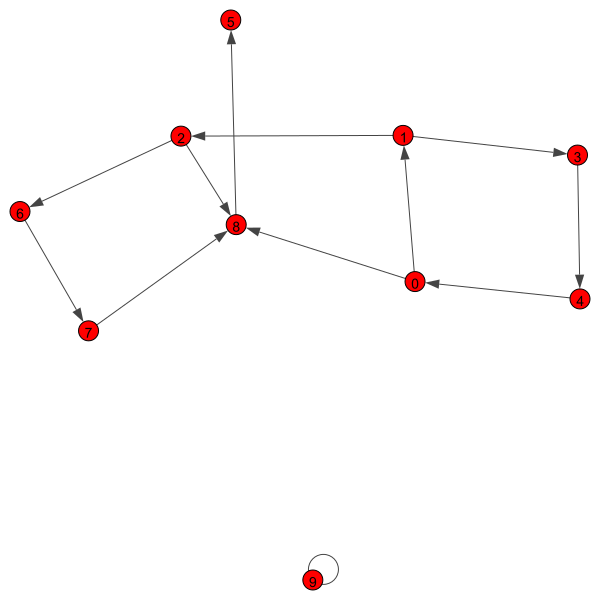

In [43]:
igraph, layout = get_layouted_graph("auto")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])	

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together (for example nodes 0 and 1, 2 and 8, ...). Edges have fairly similar lengths.
- Nodes that are unconnected, seem to be placed further apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- The coordinates themselfes are pretty close together (all between 2 and -2).

**Verdict**:
Overall, this type of layout would probably be helpful for an A* algorithm.
Fir bigger numbers of nodes, the small distances between nodes may become an issue. It is likely a good idea to scale them up to assure they are sufficiently different so small number problems - like floating point imprecision - don't play a role.


### Star layout


Calculated Coordinates: 
0 [0.0, 0.0]
1 [1.0, 0.0]
2 [0.766044443118978, 0.6427876096865393]
3 [0.17364817766693041, 0.984807753012208]
4 [-0.4999999999999998, 0.8660254037844387]
5 [-0.9396926207859083, 0.3420201433256689]
6 [-0.9396926207859084, -0.34202014332566866]
7 [-0.5000000000000004, -0.8660254037844385]
8 [0.17364817766692997, -0.9848077530122081]
Calculated Layout: 


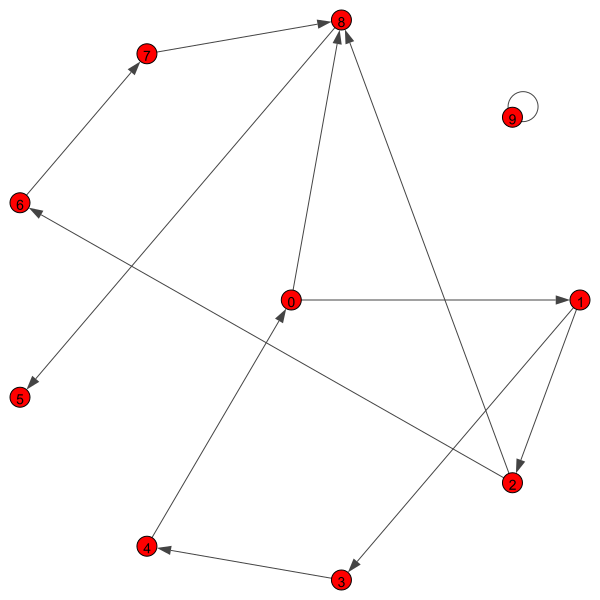

In [44]:
igraph, layout = get_layouted_graph("star")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])	

**Discussion**:
- The layout always consists of a circular configuration with 0 in the center.
- positions are determined by the nodes and not the edges.

**Verdict**:
This layout would not be helpful for A* because it does not use edges to determine positions.

### Circle Layout

Calculated Coordinates: 
0 [1.0, 0.0]
1 [0.8090169943749475, 0.5877852522924731]
2 [0.30901699437494745, 0.9510565162951535]
3 [-0.30901699437494734, 0.9510565162951536]
4 [-0.8090169943749473, 0.5877852522924732]
5 [-1.0, 1.2246467991473532e-16]
6 [-0.8090169943749475, -0.587785252292473]
7 [-0.30901699437494756, -0.9510565162951535]
8 [0.30901699437494723, -0.9510565162951536]
Calculated Layout: 


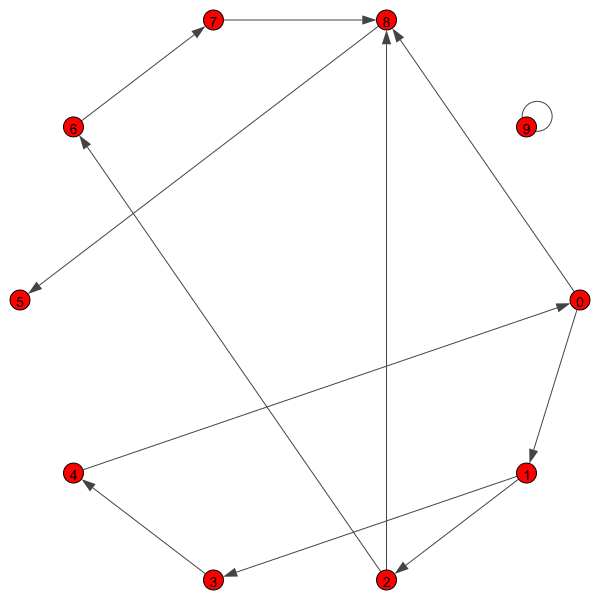

In [48]:
graph, layout = get_layouted_graph("circle")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The nodes are arranged in a circle
- positions are determined by the node id.

**Verdict**:
This layout would not be helpful for A* because it does not use edges to determine positions.


### Grid Layout

Calculated Coordinates: 
0 [0.0, 0.0]
1 [1.0, 0.0]
2 [2.0, 0.0]
3 [3.0, 0.0]
4 [0.0, 1.0]
5 [1.0, 1.0]
6 [2.0, 1.0]
7 [3.0, 1.0]
8 [0.0, 2.0]
Calculated Layout: 


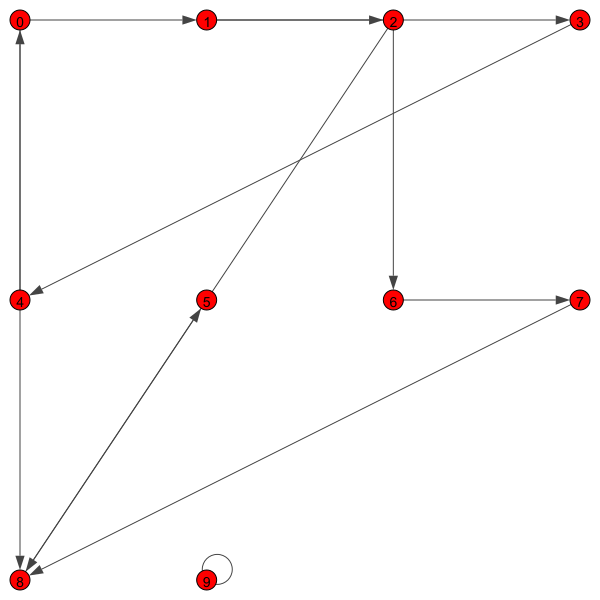

In [47]:
graph, layout = get_layouted_graph("grid")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The nodes are arranged in a grid.
- positions are determined by the node id, not by edges (for example, nodes 2 and 8 are extremely far apart)

**Verdict**:
This layout would not be helpful for A* because it does not use edges to determine positions.


### Davidson Harel

Calculated Coordinates: 
0 [-3.0531890744249073, 2.4674493019793258]
1 [-3.3576991390991644, 5.313286253519492]
2 [0.3993394351375493, 1.583519649250179]
3 [-7.02449705317891, 4.053970816198205]
4 [-6.08688597683996, 0.5354508945691195]
5 [3.079679965352187, 3.0745122698489715]
6 [5.004949689072316, 0.6795078770684275]
7 [5.7558391924916625, 4.775871846850272]
8 [1.0923167020936935, 5.11247440910264]
Calculated Layout: 


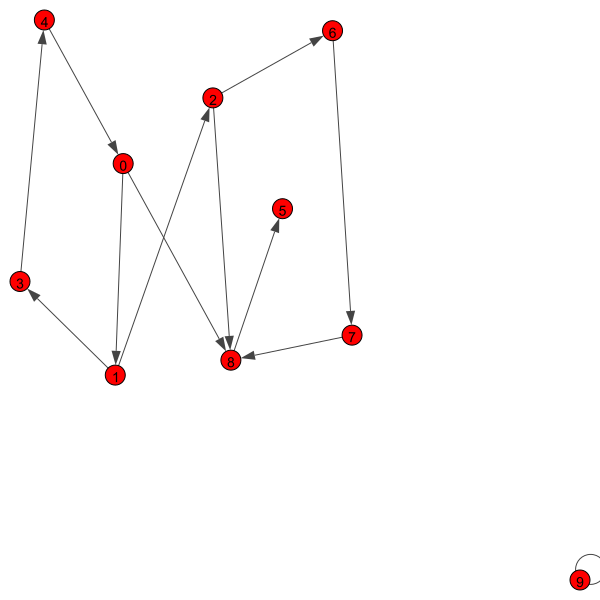

In [46]:
graph, layout = get_layouted_graph("davidson_harel")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together. Some edges are considerably longer than others.
- Nodes that are unconnected, seem to be placed further apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- Nodes seem to have a suitable distance from each other (all edges are longer than 1)

**Verdict**:
Overall, this type of layout would probably be helpful for an A* algorithm.

### DrL

Calculated Coordinates: 
0 [0.9263446927070618, -8.610655784606934]
1 [0.8497180938720703, -7.963385105133057]
2 [0.5196560621261597, -9.469640731811523]
3 [0.3545687198638916, -8.011985778808594]
4 [1.160356044769287, -8.037336349487305]
5 [-0.4533356726169586, -9.284582138061523]
6 [0.88429194688797, -9.842016220092773]
7 [0.43875065445899963, -9.022439956665039]
8 [0.07026948034763336, -8.800211906433105]
Calculated Layout: 


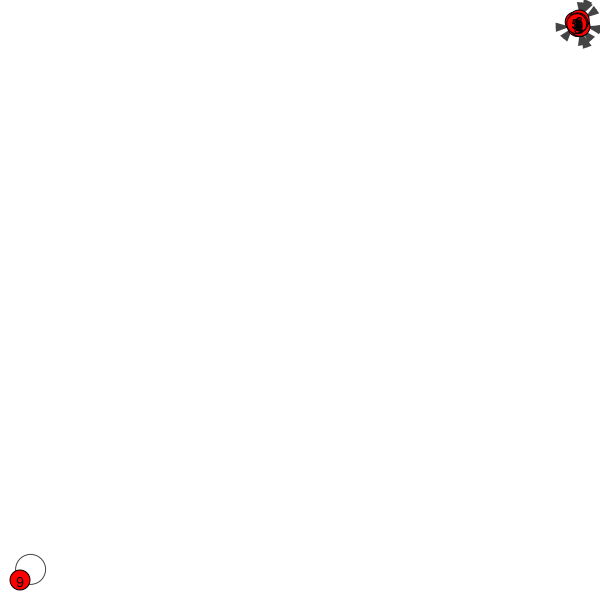

In [49]:
graph, layout = get_layouted_graph("drl")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are very close together.
- Nodes that are unconnected, seem to be placed extremely far apart (e.g., Node 9).
- In a secondary experiment that excluded the node 9, the distances between nodes looked resonable.
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- Nodes seem to have a suitable distance from each other (all edges are longer than 1)

**Verdict**:
Overall, this type of layout would probably be helpful for an A* algorithm.
The extreme difference between disconnected parts of the graph may be a helpful property if the low distances between the connected parts are not problematic.

### Fruchterman Reingold

Calculated Coordinates: 
0 [0.41705865371662143, -0.7454721206997237]
1 [1.2863031014066053, 0.03719525227188906]
2 [0.3872099720456333, 0.8538545634183928]
3 [1.9866920128976302, -0.8280033512234227]
4 [1.2331745438078228, -1.5727064697862345]
5 [-1.7497377867820192, -0.45685632604624515]
6 [-0.2217362586604533, 1.7688066381610488]
7 [-1.1121018460836183, 1.1832092928821252]
8 [-0.6473274452261629, 0.08418053334465041]
Calculated Layout: 


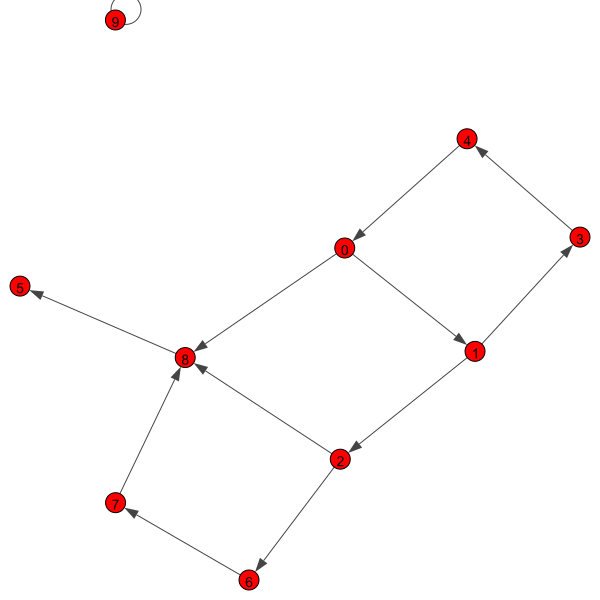

In [53]:
graph, layout = get_layouted_graph("fruchterman_reingold")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together. Edges are very close in length.
- Nodes that are unconnected, seem to be placed further apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- Nodes seem to have a suitable distance from each other

**Verdict**:
Overall, this type of layout would probably be helpful for an A* algorithm.

### Graphopt

Calculated Coordinates: 
0 [-12.453994389517014, -1.1935152357768584]
1 [-17.337742320838586, -31.72450985266724]
2 [18.591346621167496, -34.87523167065044]
3 [-50.342557215957285, -28.319009596022163]
4 [-46.53322409029956, 0.474922994763432]
5 [42.467089652114495, 30.17155190025868]
6 [49.22229495360611, -46.54978558100997]
7 [58.44348464107441, -19.04269284609047]
8 [27.830454220450466, -1.5168038090187943]
Calculated Layout: 


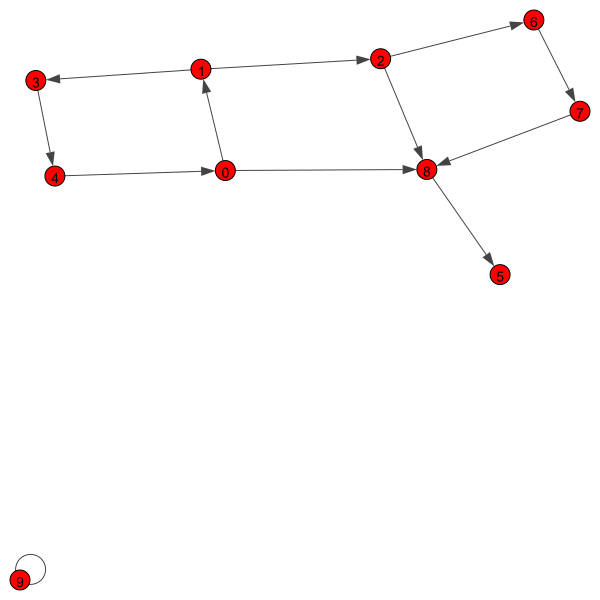

In [55]:
graph, layout = get_layouted_graph("graphopt")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together. Edges are very close in length.
- Nodes that are unconnected, seem to be placed further apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- Nodes seem to have a suitable distance from each other.

**Verdict**:
Overall, this type of layout would probably be helpful for an A* algorithm.

### Kamada Kawai

Calculated Coordinates: 
0 [0.3198611235998333, 0.2625614546621845]
1 [-0.1537656117688888, 0.7699903735053222]
2 [-0.7263572661537128, 0.06795328571006469]
3 [0.8384332293394814, 1.136027851483433]
4 [0.28587431956661347, 1.284404787938428]
5 [-1.3175875885136017, -0.551702166256678]
6 [-0.8289340325689786, -0.97465303380299]
7 [-0.12039950221901956, -1.3016345845412427]
8 [-0.2617311869024127, -0.4490704142228435]
Calculated Layout: 


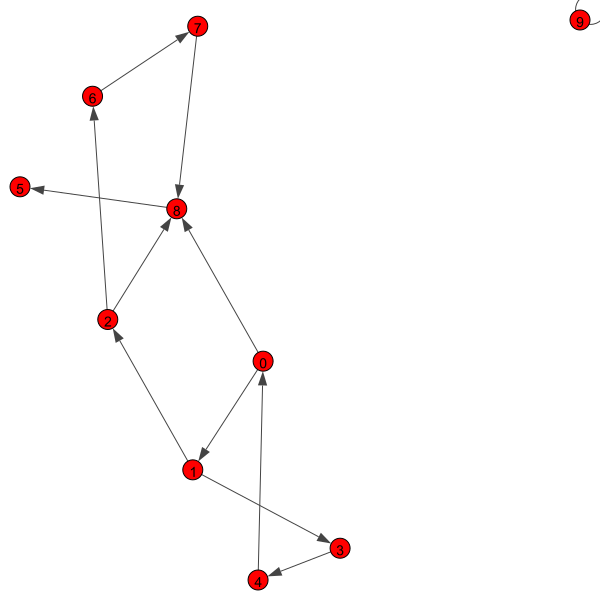

In [58]:
graph, layout = get_layouted_graph("kamada_kawai")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together. Edges are very close in length.
- Nodes that are unconnected, seem to be placed further apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- Nodes seem to have a suitable distance from each other.

**Verdict**:
Overall, this type of layout would probably be helpful for an A* algorithm.

### LGL

Calculated Coordinates: 
0 [547321.4229404255, -913109.9307245052]
1 [-993766.7667536894, -118298.65620378443]
2 [-993765.2993818158, -118295.74938151642]
3 [-993766.8857711321, -118301.05566406767]
4 [547308.2938482089, -913140.2200938553]
5 [547101.4811254764, -913258.8428962409]
6 [-993619.5657450797, -117369.59344228845]
7 [-855.5930198076984, -2263.7400929603696]
8 [547094.6793433975, -913254.5670431397]
Calculated Layout: 


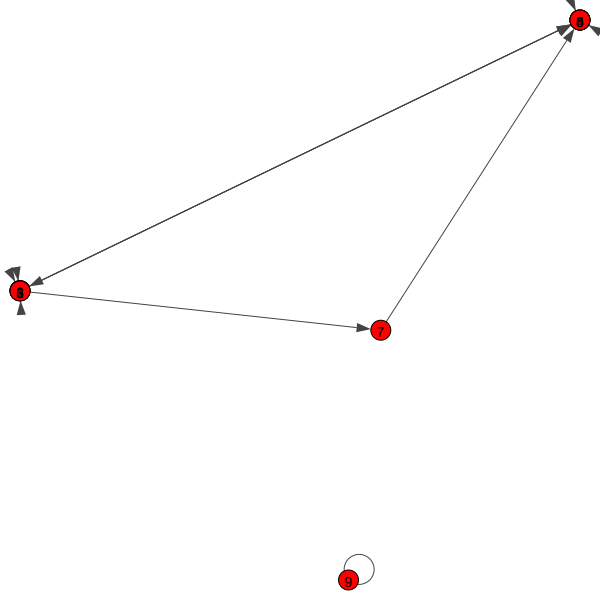

In [65]:
graph, layout = get_layouted_graph("lgl")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together. 
- Some nodes are extremely close by while others are extremely far apart.
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.

**Verdict**:
While this algorithm contains some useful information, the inconsistent distance is concerning. Since we have already seen clearly better layouts, we will exclude this one. 

### MDS 

Calculated Coordinates: 
0 [0.6268738130921134, -2.2733593387053737]
1 [1.488596078272018, 1.1195959879122572]
2 [-1.293408792991234, 1.4073954311167116]
3 [4.115398740208962, 1.2321344806020416]
4 [2.968187861266104, -3.1723009329328278]
5 [-3.2934584822146338, -3.155501955951821]
6 [-3.1160689894114526, 3.1723009329328278]
7 [-4.115398740208962, -1.0291865609611464]
8 [-1.987093945657164, -1.7369795130060206]
Calculated Layout: 


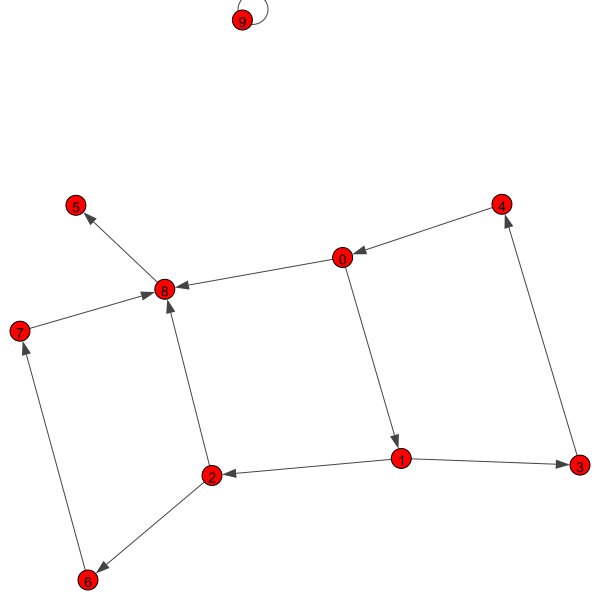

In [67]:
graph, layout = get_layouted_graph("mds")

print("Calculated Coordinates: ")
for node in range(9):
    print(node, layout.coords[node])

print("Calculated Layout: ")
ig.plot(igraph, layout = layout, vertex_label=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

**Discussion**:
- The layout seems to be based on the connections of nodes. 
- Nodes that are connected to each other are generally close together. Edges are similar in length but some are longer than others.
- Nodes that are unconnected, seem to be placed apart (e.g., Node 9).
- The layout is non-deterministic. Recalculating it with the same graph yields different layouts.
- Edges are similar in length but some are longer than others by a factor of 2 or 3.

**Verdict**:
Overall, this type of layout would probably be helpful for an A* algorithm, although the inconsistent edge length is concerning.

## Summary

The following table summarizes our observation with respect to the main criteria.

| Layout | Edge-based Layout | Consistent Edge Length | Inclusion |
|--------|--------|  ------| ------ |
| auto | Yes | Yes| Yes |
| star | No | Yes | No|
| circle | No| Yes | No |
| grid | No| Yes | No |
| davidson_harel| Yes| Yes| Yes| 
| drl | Yes | Yes| Yes| 
| fruchterman_reingold| Yes | Yes| Yes| 
| graphopt| Yes | Yes | Yes| 
| kamada_kawai| Yes |Yes| Yes| 
| lgl | Yes| No | No |
| mds | Yes| Yes| Yes| 

This means we will include auto, davidson_harel, drl, fruchterman_reingold, graphopt, kamada_kawai and mds in experiments.

Additional Notes:
- All layouts have shown considerable variety when rerun. This indicates that we may need to experiment with them multiple times.
- the layouts fruchterman_reingold, graphopt and kamada_kawai have shown the most consistent edge lengths in this experiment. This may be a property that is helpful for A*.
- Auto - davidson_harel, fruchterman_reingold, kamada_kawai and mds have resulted in nodes that are extremely close together. For a graph with 20000 nodes, the differences between the coordinates may be neglectible. For this reason, we will scale their coordinates by a value of 1000.
